# 問1

顧客データが650人分あり、Age(年齢)、Browsing(1日のネット閲覧時間)、PurchaseBefore(これまでのデザインのときの購入額)、PurchaseAfter(新しいデザインのときの購入額)が確認できます。

また、ネット閲覧時間の平均は12.4時間、中央値は12時間、最短時間は0時間、最長時間は23時間になっています。


In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_excel("data/chapter10_exercise.xlsx")
df.describe()

,ID,Treatment,Age,Browsing,PurchaseBefore,PurchaseAfter
count,650.00000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,324.50000,0.503077,34.350769,12.449231,5221.770749,6987.750172
std,187.78312,0.500376,6.181391,3.221371,310.430609,348.734081
min,0.00000,0.000000,19.000000,0.000000,4152.062696,5873.865757
25%,162.25000,0.000000,30.000000,10.000000,5017.023951,6754.270489
50%,324.50000,1.000000,34.000000,12.000000,5219.194458,6975.028874
75%,486.75000,1.000000,38.000000,15.000000,5415.820893,7223.487390
max,649.00000,1.000000,52.000000,23.000000,6231.381897,8070.469098


# 問2

傾向スコアを求めた後、ヒストグラムを描くと次のようになります。重なっている部分が見られ、うまくマッチングできそうです。

In [2]:
from sklearn.linear_model import LogisticRegression

X = df[["Age", "Browsing", "PurchaseBefore"]]
y = df["Treatment"]

model = LogisticRegression()
model.fit(X, y)

prop_score = model.predict_proba(X)

df["prop"] = prop_score[:, 1]
df.head()

,ID,Treatment,Age,Browsing,PurchaseBefore,PurchaseAfter,prop
0,0,0,20,9,4652.128871,6530.572189,0.067054
1,1,1,30,16,5901.004582,7663.804536,0.717369
2,2,0,36,12,5414.933172,7397.363048,0.497304
3,3,1,41,15,5246.673459,7116.532580,0.842569
4,4,1,35,11,5311.450888,6898.694394,0.380212


<Axes: xlabel='prop', ylabel='Count'>

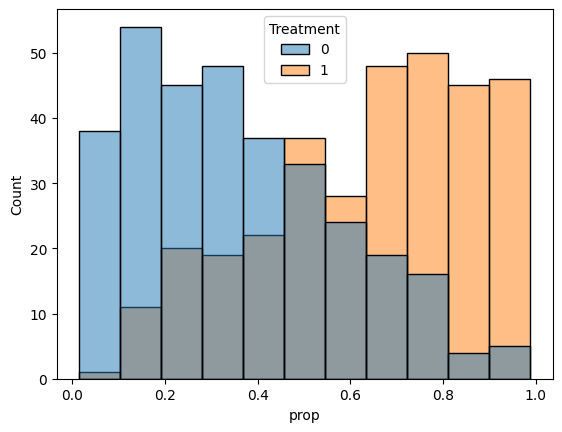

In [3]:
sns.histplot(
    data=df,
    x="prop",
    hue="Treatment"
)

# 問3

新しいデザインの顧客の購入額のほうが112円ほど高くなっています。デザインを変えることの効果がないとは言いませんが、もともとの購入額の平均が5000円強であることを考えると、その効果はあまり大きくないようです。

In [4]:
df["group"] = (df.prop * 20).astype(int)

ps_match_a = (
    df.groupby(
        ["group", "Treatment"]
    )["PurchaseAfter"]
    .mean()
    .unstack("Treatment")
)

ps_match_a.columns = ["untreated", "treated"]

ps_match_a["difference"] = ps_match_a.treated - ps_match_a.untreated
ps_match_a.difference.mean()

np.float64(-33.55962557420356)